In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from NeuralNetwork import NeuralNetwork,Layer,InputLayer,sigmoid,linear,relu

# Load the dataset

In [2]:
df = pd.read_excel('concrete_data.xlsx')
df.head()

,cement,water,superplasticizer,age,concrete_compressive_strength
0,540.0,162.0,2.5,28,79.99
1,540.0,162.0,2.5,28,61.89
2,332.5,228.0,0.0,270,40.27
3,332.5,228.0,0.0,365,41.05
4,198.6,192.0,0.0,360,44.30


# Dataset Analysis

In [3]:
df.isna().sum()

cement                           0
water                            0
superplasticizer                 0
age                              0
concrete_compressive_strength    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         700 non-null    float64
 1   water                          700 non-null    float64
 2   superplasticizer               700 non-null    float64
 3   age                            700 non-null    int64  
 4   concrete_compressive_strength  700 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 27.5 KB


In [5]:
df.describe()

,cement,water,superplasticizer,age,concrete_compressive_strength
count,700.000000,700.000000,700.000000,700.000000,700.000000
mean,286.917286,178.059857,6.506857,49.010000,37.642514
std,101.379325,23.030158,6.289468,68.400978,17.607925
min,102.000000,121.800000,0.000000,3.000000,2.330000
25%,212.000000,159.500000,0.000000,7.000000,24.280000
50%,254.000000,178.500000,6.500000,28.000000,36.615000
75%,374.000000,192.000000,10.900000,56.000000,50.120000
max,540.000000,228.000000,32.200000,365.000000,82.600000


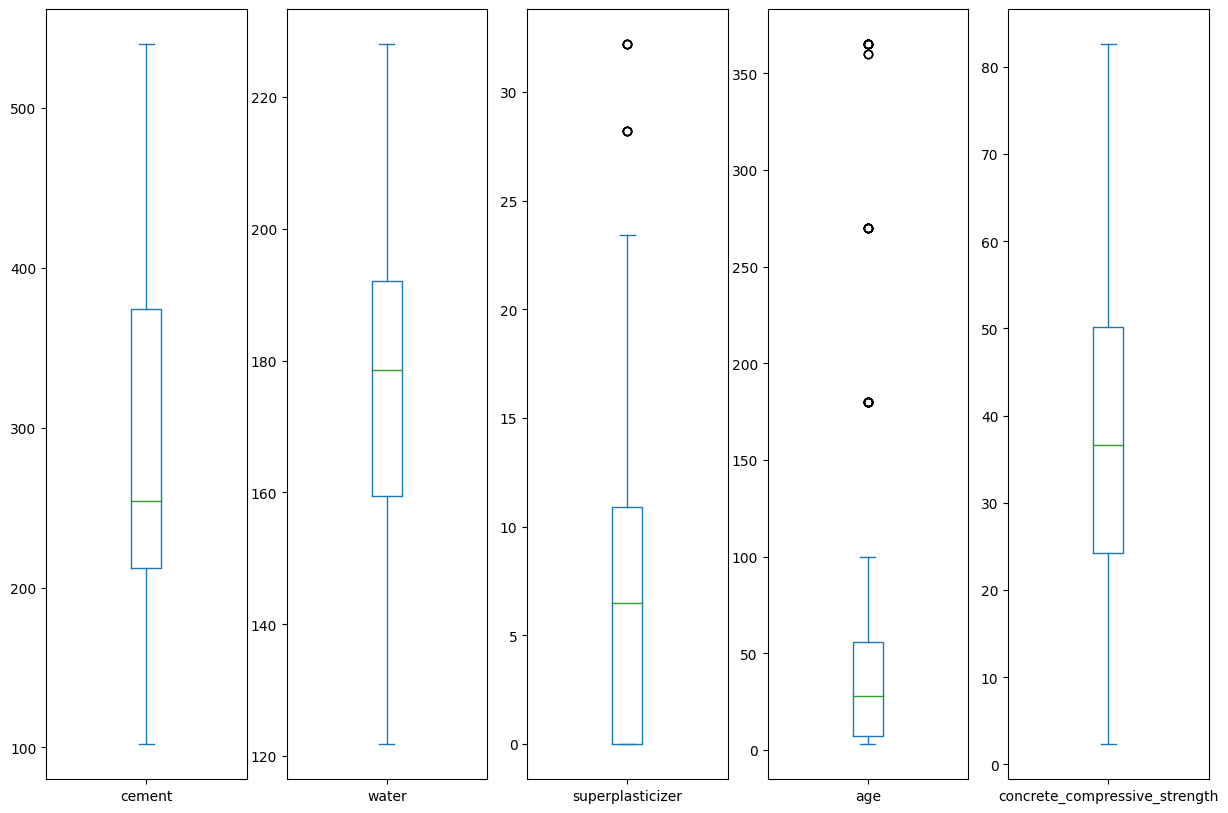

In [6]:
df.plot(kind='box', figsize=(15, 10), subplots=True)
plt.show()

# Dataset Preprocessing

In [7]:
X = df.drop(columns=['concrete_compressive_strength'])
y = df['concrete_compressive_strength']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# Neural Network

In [9]:
nn = NeuralNetwork(layers=[
    InputLayer(4),
    Layer(4, 128, sigmoid),
    Layer(128, 1, linear)
])
nn.fit(x_train, y_train, epochs=1000, learning_rate=0.01)


y_pred = nn.predict(x_test)

print('Predicted: ', y_pred)

error = nn.calculate_accuracy(y_test, y_pred)

print('Neural Network Error: ', error)

Epoch: 1/1000, Error: 238.441069
Epoch: 2/1000, Error: 181.445353
Epoch: 3/1000, Error: 177.225468
Epoch: 4/1000, Error: 176.969079
Epoch: 5/1000, Error: 177.009976
Epoch: 6/1000, Error: 177.029366
Epoch: 7/1000, Error: 177.016414
Epoch: 8/1000, Error: 176.946051
Epoch: 9/1000, Error: 176.685754
Epoch: 10/1000, Error: 175.827374
Epoch: 11/1000, Error: 173.702377
Epoch: 12/1000, Error: 170.106436
Epoch: 13/1000, Error: 165.596822
Epoch: 14/1000, Error: 160.862589
Epoch: 15/1000, Error: 156.313567
Epoch: 16/1000, Error: 152.098843
Epoch: 17/1000, Error: 148.223626
Epoch: 18/1000, Error: 144.636998
Epoch: 19/1000, Error: 141.272936
Epoch: 20/1000, Error: 138.070598
Epoch: 21/1000, Error: 134.987858
Epoch: 22/1000, Error: 132.007781
Epoch: 23/1000, Error: 129.134462
Epoch: 24/1000, Error: 126.382648
Epoch: 25/1000, Error: 123.769482
Epoch: 26/1000, Error: 121.308209
Epoch: 27/1000, Error: 119.004713
Epoch: 28/1000, Error: 116.857392
Epoch: 29/1000, Error: 114.858585
Epoch: 30/1000, Error: 